In [11]:
import math as m
import numpy as np
from numpy.linalg import inv
import seaborn as sns
from copy import deepcopy
from typing import List, Tuple, Dict
import matplotlib.pyplot as plt

# Задание 1. Ксения


Смоделируем измерения Yk c ошибками, имеющими норамльное распределение N(0, D)

Начальные условия:

In [84]:
n = 40 # количество измерений, 30-40
h = 4 # шаг измерений, 3-6 с
V = 0.3 # скорость, 0.2-0.3 км/с
sko = 0.001 # СКО, 1-2 км
m = 0 # математическое ожидание
alpha = 0.05 # уровень значимости доверительного интервала
probability = 1 - alpha # вероятность попадания величины в промежуток (-u_a; u_a)
ur_znach = 1.96 # значение по таблице 
# Ф(x) = (1 - alpha) / 2 = 0.95 / 2 = 0.475

Создадим список с тактами, в которые происходят измерения:

In [85]:
t = np.array([(h * i) for i in range(n)]) #время

Зададим начальные координаты

In [87]:
x0 = 30
y0 = 40
x1 = 90 * np.cos(45)
y1 = 90 * np.sin(45)
print(x1, y1)

# vector1 = np.array([y_0, y_1])
# Matr1 = np.array([[x_0, 1], [x_1, 1]])
# k, b = np.linalg.solve(Matr1, vector1)

# print(k, b)

# napravl vector
a1 = np.cos(45)
a2 = np.sin(45)

# polu4ennie izmerenia
x = np.array([x0 + a1 * V * i for i in t ])
y = np.array([y0 + a2 * V * i for i in t ])

print('Изменения с НИС')
print('x:\n', x, '\n', 'y:\n', y)

47.27897899359568 76.58131720807066
Изменения с НИС
x:
 [30.         30.63038639 31.26077277 31.89115916 32.52154555 33.15193193
 33.78231832 34.41270471 35.04309109 35.67347748 36.30386387 36.93425025
 37.56463664 38.19502303 38.82540941 39.4557958  40.08618219 40.71656857
 41.34695496 41.97734135 42.60772773 43.23811412 43.8685005  44.49888689
 45.12927328 45.75965966 46.39004605 47.02043244 47.65081882 48.28120521
 48.9115916  49.54197798 50.17236437 50.80275076 51.43313714 52.06352353
 52.69390992 53.3242963  53.95468269 54.58506908] 
 y:
 [40.         41.02108423 42.04216846 43.06325269 44.08433692 45.10542115
 46.12650538 47.14758961 48.16867384 49.18975806 50.21084229 51.23192652
 52.25301075 53.27409498 54.29517921 55.31626344 56.33734767 57.3584319
 58.37951613 59.40060036 60.42168459 61.44276882 62.46385305 63.48493728
 64.50602151 65.52710574 66.54818997 67.56927419 68.59035842 69.61144265
 70.63252688 71.65361111 72.67469534 73.69577957 74.7168638  75.73794803
 76.75903226 

Сформируем набор истинных измерений (без учета ошибок), как быдто мы знаем точную дальность r ЛА в каждый такт

In [92]:
azimut_nast = np.arctan(y, x)
print(azimut_nast)

[1.54580153 1.54642345 1.54701517 1.54757884 1.54811642 1.54862967
 1.54912021 1.54958951 1.55003893 1.55046969 1.55088294 1.55127973
 1.55166101 1.55202768 1.55238057 1.55272043 1.55304798 1.55336386
 1.55366871 1.55396307 1.55424749 1.55452246 1.55478844 1.55504586
 1.55529514 1.55553665 1.55577075 1.55599778 1.55621805 1.55643186
 1.55663949 1.5568412  1.55703725 1.55722786 1.55741327 1.55759367
 1.55776928 1.55794028 1.55810685 1.55826915]


### Пункт 1. Ошибки с нормальным распределением

Добавим на измерения ошибки, распределенные нормально

С помощью встроенной функции на питон, выдающей случаные величины по заданному распределению, получим вектор ошибок, распределенных нормало

In [101]:
W_k = np.array([np.random.normal(0, sko) for i in range(n)])
print(W_k)

[ 4.68706746e-04  9.83620883e-05 -1.68092227e-03 -2.56198706e-04
  1.72266304e-03 -1.11665822e-03  1.75901898e-03  1.22695139e-04
  2.27615950e-03 -1.15543629e-03 -4.87928682e-04 -2.96252752e-04
 -6.15505944e-04  2.22103290e-04 -5.66043820e-04 -9.23605019e-04
 -1.39505539e-03  1.09006665e-03  1.28677501e-03 -1.77635792e-03
 -1.06987974e-04 -2.25124470e-04 -2.06808624e-03  2.09826537e-03
  3.93603840e-04 -6.48316461e-04  1.00542835e-03  6.34605776e-04
  7.73969872e-04  3.31237691e-04  1.25266974e-03 -2.78709574e-04
  2.08651745e-03 -1.07804947e-03  1.11586984e-04 -1.45845676e-03
 -1.18070013e-04 -3.10936145e-04  2.99434287e-04 -9.50774600e-04]


Сформируем окончательный набор с ошибками, распределенными нормально:

In [102]:
Y = azimut_nast + W_k
print(Y)

[1.54627024 1.54652181 1.54533425 1.54732265 1.54983909 1.54751302
 1.55087923 1.54971221 1.55231509 1.54931426 1.55039501 1.55098347
 1.5510455  1.55224979 1.55181452 1.55179682 1.55165292 1.55445393
 1.55495548 1.55218671 1.5541405  1.55429733 1.55272035 1.55714413
 1.55568874 1.55488833 1.55677618 1.55663239 1.55699202 1.5567631
 1.55789216 1.55656249 1.55912376 1.55614981 1.55752485 1.55613522
 1.55765121 1.55762934 1.55840628 1.55731838]


Изобразим на рисунке истинную дальность и измерения:

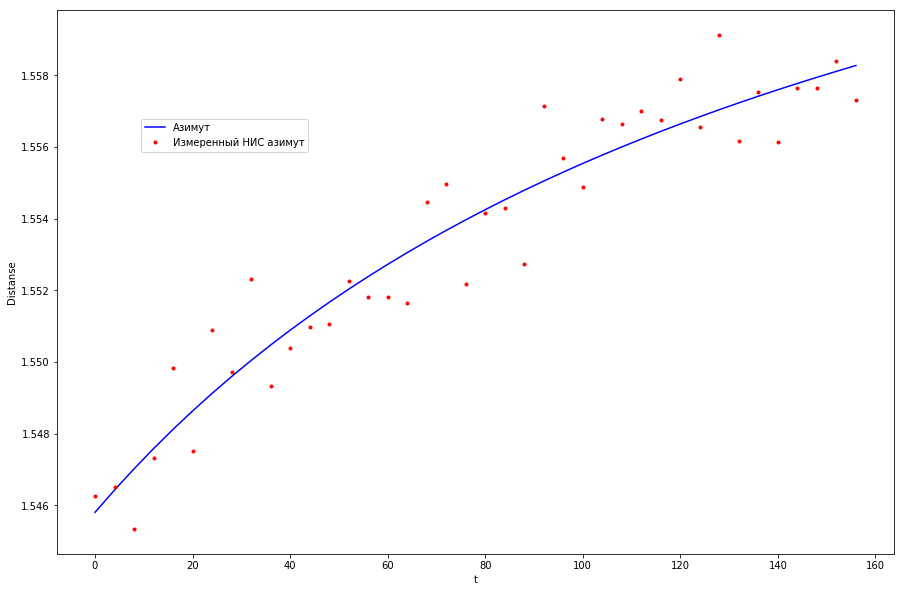

In [103]:
plt.figure(figsize=(15, 10))
plt.plot(t, azimut_nast, label = 'Азимут', color='b')
plt.plot(t, Y, '.', label = 'Измеренный НИС азимут', color='r', marker = '.')
plt.ylabel('Distanse')
plt.xlabel('t')
plt.legend(bbox_to_anchor=(0.1, 0.8), loc='upper left', borderaxespad=0.)

plt.show()

# Задание 2.

Решение аналитически, матричным способом

In [140]:
Vector2 = np.array([sum(Y), sum(t * Y)])
Matrix2 = np.array([[n, sum(np.array(t))], [sum(np.array(t)), sum(np.array(t)**2)]])
tetta1, tetta2 = np.linalg.solve(Matrix2, Vector2)

print('Параметры', tetta1, tetta2)
azimut_approx = tetta1 + tetta2 * t

Параметры 1.5474850112297935 7.615132330617748e-05


Построение доверительного интервала

Посчитаем границы промежутка (-u_a; u_a):

In [141]:
Aa = np.matrix([np.ones(n),t]).transpose() #. матрица А как у влада и ани в отчете про мнк
I = np.eye(n) # единичная матрица
sigma = np.var(W_k)

In [142]:
# тут считает вектор дисперсии для доверительного интервала
def dispersion_count(t_arr):
    Disp = []
    for i in t:
        h_t = np.matrix([1, i]).transpose()
        a = h_t.transpose().dot(inv(Aa.transpose().dot(Aa))).dot(Aa.transpose())
        d_temp = a.dot(sigma).dot(I).dot(a.transpose())
        Disp.append(d_temp.item(0))
    Disp = np.array(Disp)
    return Disp

In [143]:
Disp = dispersion_count(t)

Дисперсия МНК-оценки, выборочная дисперсия

Доверительный интервал:

In [144]:
interval_min = azimut_approx - ur_znach * Disp**0.4
interval_max = azimut_approx + ur_znach * Disp**0.4

Графики истинной, измеренной, оцененной дальности, доверительного интервала

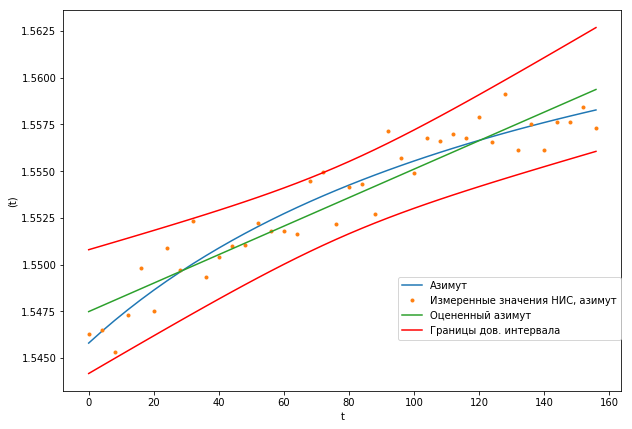

In [145]:
plt.figure(figsize=(10, 7))
plt.plot(t, azimut_nast, label = 'Азимут')
plt.plot(t, Y, '.', label = 'Измеренные значения НИС, азимут', marker = '.')
plt.plot(t, azimut_approx , label = 'Оцененный азимут')
plt.plot(t, interval_min, 'r', label = 'Границы дов. интервала')
plt.plot(t, interval_max, 'r')
plt.ylabel('(t)')
plt.xlabel('t')
plt.legend(bbox_to_anchor=(0.6, 0.3), loc='upper left', borderaxespad=0.)

plt.show()

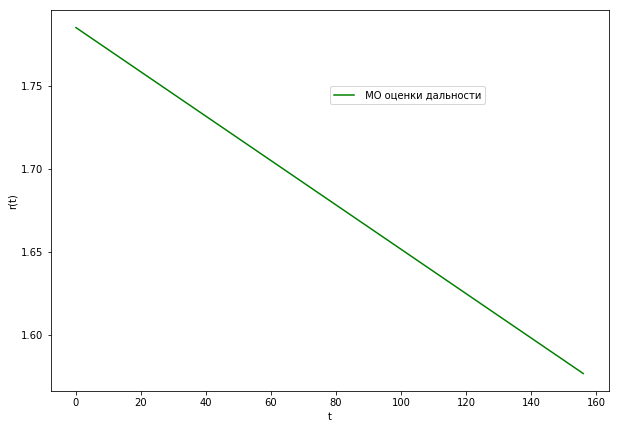

In [34]:
M = []
for i in range(1,n+1):
    M.append(np.mean(r[:i]))
M = np.array(M)

plt.figure(figsize=(10, 7))
plt.plot(t, M, label = ' МО оценки дальности', color='g')
plt.ylabel('r(t)')
plt.xlabel('t')
plt.legend(bbox_to_anchor=(0.5, 0.8), loc='upper left', borderaxespad=0.)

plt.show()

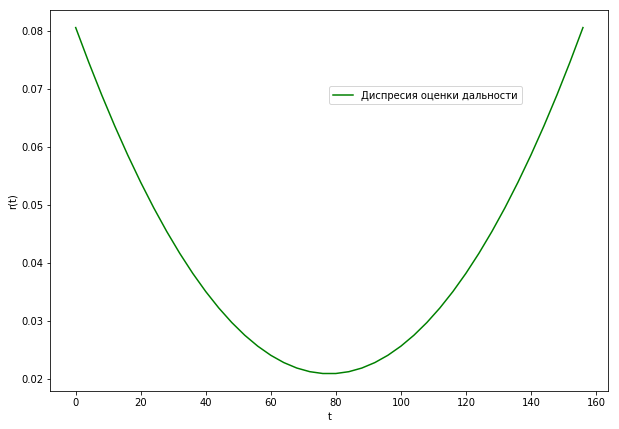

In [35]:
plt.figure(figsize=(10, 7))
plt.plot(t, Disp, label = 'Диспресия оценки дальности', color='g')
plt.ylabel('r(t)')
plt.xlabel('t')
plt.legend(bbox_to_anchor=(0.5, 0.8), loc='upper left', borderaxespad=0.)

plt.show()

# Задание 3.

Решим задачу поиска параметров матричным способом

In [36]:
d11 = n
d12 = sum(t)
d13 =sum(t**2)
d21 = sum(t)
d22 = sum(t**2)
d23 = sum(t**3)
d31 = sum(t**2)
d32 = sum(t**3)
d33 = sum (t**4)
D = np.array([[d11, d12, d13], \
             [d21, d22, d23], \
             [d31, d32, d33]])
print(D)

[[        40       3120     328640]
 [      3120     328640   38937600]
 [    328640   38937600 4920660992]]


In [37]:
A_1 = sum(Yk_1)
A_2 = sum(Yk_1 * t)
A_3 = sum(Yk_1 * t**2)
A_ = np.array([A_1, A_2, A_3])
print(A_)

[6.30711186e+01 4.69176180e+03 4.79319098e+05]


In [38]:
teta_1, teta_2, teta_3 = np.linalg.solve(D, A_)
print(teta_1, teta_2, teta_3)
r_ = teta_1 + teta_2 * t + teta_3 * t**2

1.6942351882464566 0.0009164616316493003 -2.299674192079537e-05


Аналогично заданию 2 построим графические данные для задания 3

Границы промежутка:

Дисперсия МНК-оценки, выборочная дисперсия

In [39]:
Aa = np.matrix([np.ones(n),t, t**2]).transpose() #. матрица А как у влада и ани в отчете про мнк
I = np.eye(n) # единичная матрица
sigma = np.var(Wk)

In [40]:
# тут считает вектор дисперсии для доверительного интервала
def dispersion_count(t_arr):
    Disp1 = []
    for i in t:
        h_t = np.matrix([1, i, i**2/2]).transpose()
        a = h_t.transpose().dot(inv(Aa.transpose().dot(Aa))).dot(Aa.transpose())
        d_temp = a.dot(sigma).dot(I).dot(a.transpose())
        Disp1.append(d_temp.item(0))
    Disp1 = np.array(Disp1)
    return Disp1

In [41]:
Disp1 = dispersion_count(t)

Графики истинной, измеренной, оцененной дальности, доверительного интервала

In [42]:
r_uleft_3 = r_ - ur_znach * Disp1**0.01
r_urght_3 = r_ + ur_znach * Disp1**0.01

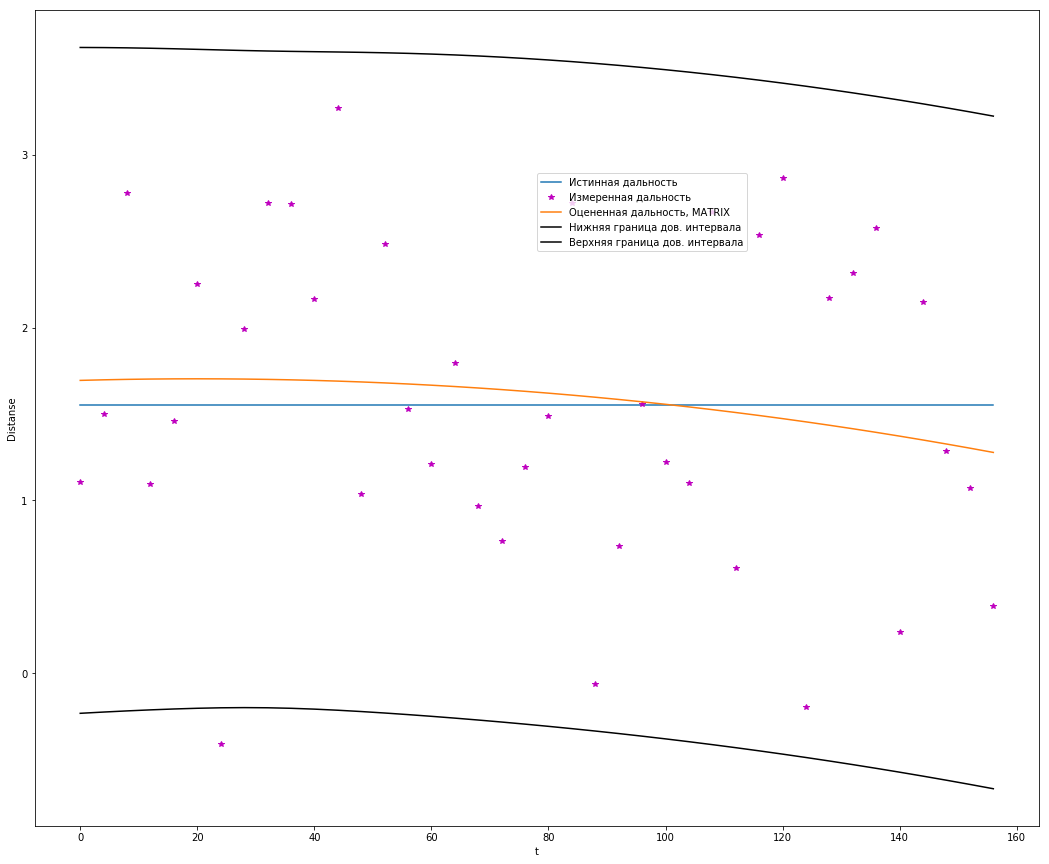

In [43]:
plt.figure(figsize=(18, 15))
plt.plot(t, r_real, label = 'Истинная дальность')
plt.plot(t, Yk_1, '.', label = 'Измеренная дальность', color='m', marker = '*')
# plt.plot(t, r0, label = 'Оцененная дальность, Dima')
plt.plot(t, r_, label = 'Оцененная дальность, MATRIX')
plt.plot(t, r_uleft_3, 'black', label = 'Нижняя граница дов. интервала')
plt.plot(t, r_urght_3, 'black', label = 'Верхняя граница дов. интервала')
plt.ylabel('Distanse')
plt.xlabel('t')
plt.legend(bbox_to_anchor=(0.5, 0.8), loc='upper left', borderaxespad=0.)

plt.show()

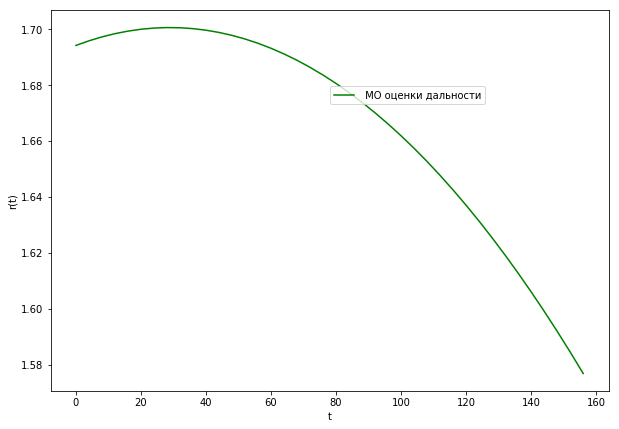

In [44]:
M = []
for i in range(1,n+1):
    M.append(np.mean(r_[:i]))
M = np.array(M)

plt.figure(figsize=(10, 7))
plt.plot(t, M, label = ' МО оценки дальности', color='g')
plt.ylabel('r(t)')
plt.xlabel('t')
plt.legend(bbox_to_anchor=(0.5, 0.8), loc='upper left', borderaxespad=0.)

plt.show()

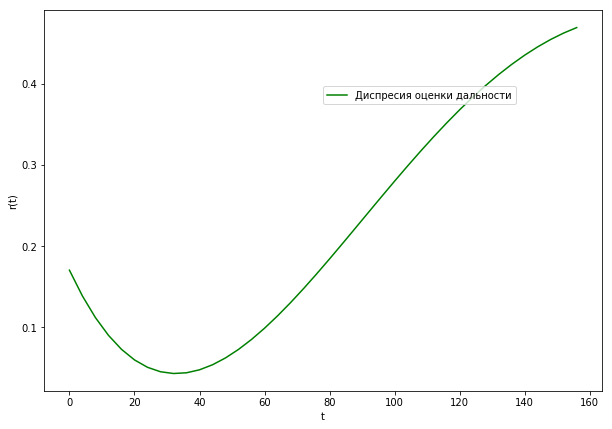

In [45]:
plt.figure(figsize=(10, 7))
plt.plot(t, Disp1, label = 'Диспресия оценки дальности', color='g')
plt.ylabel('r(t)')
plt.xlabel('t')
plt.legend(bbox_to_anchor=(0.5, 0.8), loc='upper left', borderaxespad=0.)

plt.show()

# Задание 4

На уровне значимости $\alpha$ проверить гипотезу $H_{0} : \{\theta_{3}=0\}$


Найдем t-критическое по таблице распределения Стьюдента на уровне значимости $\alpha = 0,05$. 
$t_{n-k}$, где $n$ - число измерений (величина выборки), $k$ - число оцениваемых параметров
$t_{30-3}=t_{27}=2,0518$ 

In [46]:
H3def = inv(Aa.transpose().dot(Aa))
Ktheta = 0.01 * H3def
Dispers = Ktheta[2, 2]
T_ = teta_3 / Dispers**0.5
print(T_)
Ul = -1.95996 # границы доверительного интервала
Ur = - Ul # границы доверительного интервала

-2.770899106124221


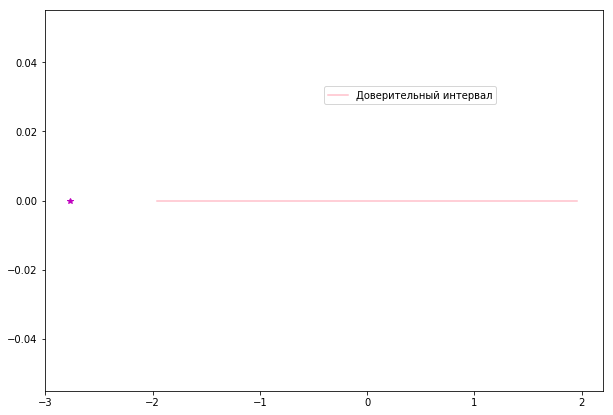

In [47]:
plt.figure(figsize=(10, 7))
plt.plot([Ul, Ur], [0,0], label = 'Доверительный интервал', color = 'pink')
plt.plot(T_, 0, '*', color='m')

plt.legend(bbox_to_anchor=(0.5, 0.8), loc='upper left', borderaxespad=0.)

plt.show()

Так как 0 попадает в доверительный интервал, построенный для $\theta_{3}=0$, гипотеза $H_{0} : \{\theta_{3}=0\}$ не отклоняется.

Для аппроксимации достаточно выбрать модель простой линейной регрессии,  так как гипмотеза о тета=0 подтвердилась, значит, третий оцененный параметр не влияет на уравнение дальности (так как ЛА по условию задачи движется равномерно и прямолинейно )

# Задание 5

Выбрана модель простой линейной регрессии. Построим для нее гистограмму вектора остатков

Остатки:

In [48]:
residual = r - Yk_1
# r_ - оцененная дальность с помощью МНК (зеленая прямая)
#Yk_1 - измеренная дальность (оранжевые точки)
print(residual)

[ 0.67625125  0.272088   -1.01455996  0.65661153  0.28556001 -0.51906822
  2.12948393 -0.27921791 -1.01890304 -1.0238408  -0.48567201 -1.6024893
  0.61958376 -0.83944999  0.10807526  0.41500241 -0.18238533  0.63711148
  0.82794949  0.3894656   0.08471062 -1.16141258  1.60958671  0.80482632
 -0.03055682  0.29374203  0.40381066 -1.17226787  0.87699492 -1.05918587
 -1.40103176  1.6477774  -0.72946641 -0.88420121 -1.15530931  1.17511196
 -0.74840038  0.10602635  0.30791737  0.97973171]


In [49]:
# скопировала в rr наши остатки, чтобы их не изменить случайно
rr = deepcopy(residual) 
# сортирую по возрастанию
rr = sorted(rr)
left = min(rr)
right = max(rr)
bins_s = [i for i in np.linspace(left, right, 6)]
def gaussian(x, mu, sigma):
     return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(- 0.5 * (x - mu)**2 / sigma**0.5)

/Users/synthtron/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


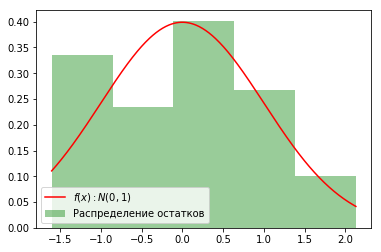

In [50]:
sns_plot = sns.distplot(residual, bins=bins_s, kde=False, norm_hist=True, label = 'Распределение остатков', color = 'g')
fig = sns_plot.get_figure()

xs = np.arange(left, right, 0.01) # Сетка значений по оси абсцисс.
p2, = plt.plot(xs, [gaussian(x, 0, 1) for x in xs], label='$f(x): N(0, 1)$', color = 'r')
plt.legend()
plt.show()

# Задание 6

На уровне значимости $\alpha = 0.05$ по критерию хи-квадрат проверить гипотезу о том, что ошибки подчиняются нормальному распределению $N(0,\sigma)$

Если $\chi^{2}_{1} <= \chi^{2} <= \chi^{2}_{2}$, то гипотеза выполняется

# Переписать теорию как у Влада. Написать свои значения критерия. Для остатков по нормальному распределению напишу ниже:
(эти вычисления я кидала в таблице)

In [51]:
t_nabl = 3.673325177
t_cr = 7.81473

t_nabl < t_cr => гипотеза принимается

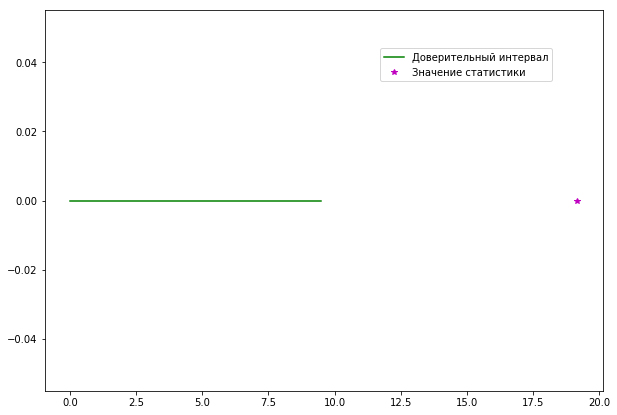

In [52]:
import scipy as scp
from scipy.stats import chisquare
quantile_ = 9.4877

bins_s
interv1 = []
interv2 = []
interv3 = []
interv4 = []
interv5 = []
for i in residual:
    if bins_s[0] < i < bins_s[1]:
        interv1.append(i)
    elif bins_s[1] < i < bins_s[2]:
        interv2.append(i)
    elif bins_s[2] < i < bins_s[3]:
        interv3.append(i)
    elif bins_s[3] < i < bins_s[4]:
        interv4.append(i)
    elif bins_s[4] < i < bins_s[5]:
        interv5.append(i)
freq_interv1 = len(interv1)
freq_interv2 = len(interv2)
freq_interv3 = len(interv3)
freq_interv4 = len(interv4)
freq_interv5 = len(interv5)

probsIntoSegment = []
for i in range(1, 6):
    f_ = (scp.erf(bins_s[i]) + 1) / (2 * (2**0.5))
    s_ = (scp.erf(bins_s[i - 1]) + 1) / (2 * (2**0.5))
    probsIntoSegment.append((f_ - s_))
probsIntoSegment = np.array(probsIntoSegment) 

cntlhs = (scp.erf(residual[0] / 2**0.5) + 1) / 2
cntrhs = (scp.erf(residual[29] / 2**0.5) + 1) / 2
# print(cntlhs, cntrhs)

drob1 = (freq_interv1 - n * probsIntoSegment[0])**2 / (n * probsIntoSegment[0])
drob2 = (freq_interv2 - n * probsIntoSegment[1])**2 / (n * probsIntoSegment[1])
drob3 = (freq_interv3 - n * probsIntoSegment[2])**2 / (n * probsIntoSegment[2])
drob4 = (freq_interv4 - n * probsIntoSegment[3])**2 / (n * probsIntoSegment[3])
drob5 = (freq_interv5 - n * probsIntoSegment[4])**2 / (n * probsIntoSegment[4])
stat_distr = (n * cntlhs + drob1 + drob2 + drob3 + drob4 + drob5 + n * (1 - cntrhs)) * 0.23


plt.figure(figsize=(10, 7))
plt.plot([0, quantile_], [0,0], color='g', label = 'Доверительный интервал')
plt.plot(stat_distr, 0, '*', color='m', label = 'Значение статистики')
plt.legend(bbox_to_anchor=(0.6, 0.9), loc='upper left', borderaxespad=0.)
plt.show()